In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,6),0)

In [12]:
print(x.shape)
print(y.shape)

(500,)
(500, 6)


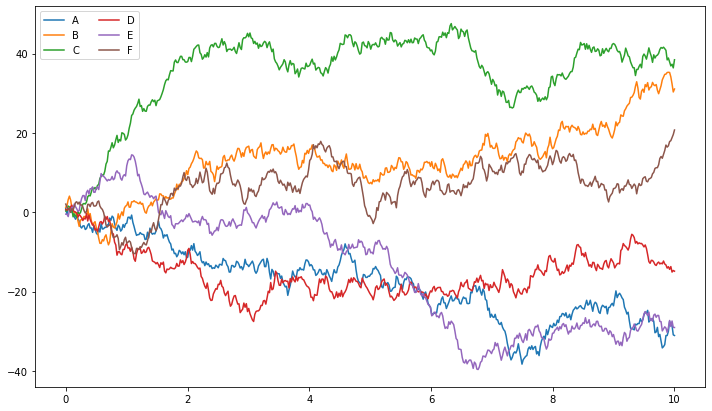

In [9]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [14]:
import requests

In [15]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [19]:
last_week = (pd.Timestamp.now()-pd.offsets.Day(7))
last_week

Timestamp('2021-06-14 22:00:16.271448')

In [20]:
btc = get_historic_price('btc','bitstamp',after=last_week)
eth = get_historic_price('eth','bitstamp',after=last_week)

Bitcoin:

In [21]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-06-14 23:00:00,40300.13,40430.07,40068.08,40186.96,104.878281,4.220148e+06
2021-06-15 00:00:00,40200.25,40603.58,40115.41,40532.79,135.437844,5.478262e+06
2021-06-15 01:00:00,40544.19,40876.43,40202.06,40380.97,124.376242,5.048426e+06
2021-06-15 02:00:00,40386.42,40483.70,39874.12,39952.02,81.841851,3.287308e+06
2021-06-15 03:00:00,39926.65,40404.55,39893.81,40267.96,94.261071,3.788302e+06


<AxesSubplot:xlabel='CloseTime'>

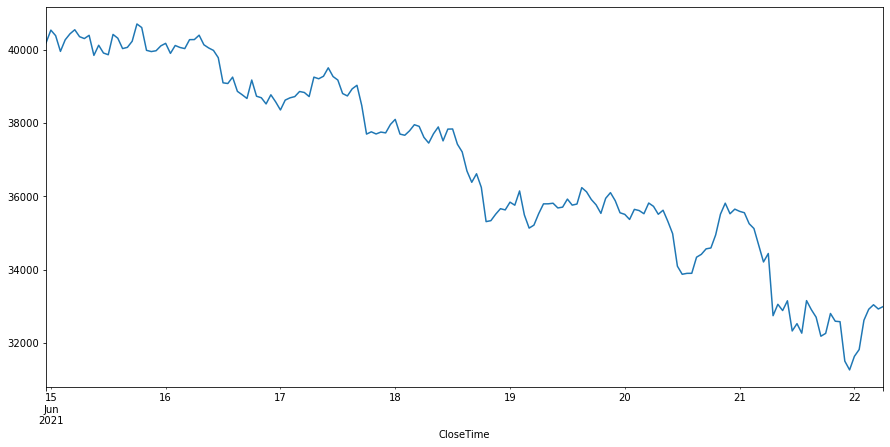

In [22]:
btc['ClosePrice'].plot(figsize=(15,7))

Ether:

In [23]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-06-14 23:00:00,2572.68,2573.49,2555.16,2556.38,1182.338938,3.032199e+06
2021-06-15 00:00:00,2559.74,2586.29,2556.40,2583.06,482.960222,1.241133e+06
2021-06-15 01:00:00,2581.67,2625.09,2573.33,2599.34,1497.098508,3.901439e+06
2021-06-15 02:00:00,2601.51,2604.79,2568.09,2569.84,479.590107,1.240807e+06
2021-06-15 03:00:00,2573.17,2596.88,2572.21,2588.10,350.611986,9.054736e+05


<AxesSubplot:xlabel='CloseTime'>

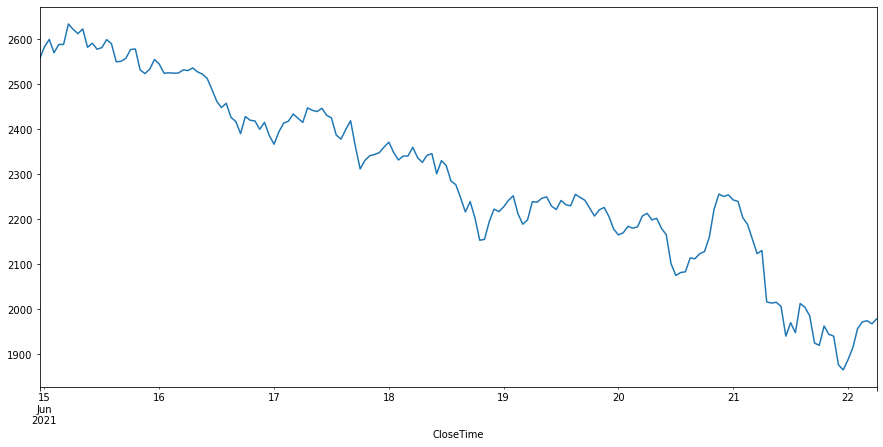

In [24]:
eth['ClosePrice'].plot(figsize=(15,7))

Bonus: Dynamic plots with Bokeh¶
We've also included Bokeh as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [26]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [27]:
output_notebook()

Loading BokehJS ...

In [28]:
p1 = figure(x_axis_type='datetime', title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index,btc['ClosePrice'], color = '#f2a900', legend = 'Bitcoin')
# p1.line(eth.index,eth['ClosePrice'], color = '#A6CEE3', legend = 'Ether')

p1.legend.location = 'top_left'
show(p1)

part 4: exporting to excel
we're now ready to generate an excel file from the downloaded prices. Working with excel and other format (like CSV or JSON) is extrmely simple in Jupyter Lab (thanks to pandas and python). our first step will be to create an "excel writer", a component from the pandas package:

In [31]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name="Bitcoin")
eth.to_excel(writer, sheet_name='Ether')

In [32]:
writer.save()

In [3]:
1+ 3

4

In [4]:
'AA'*5

'AAAAAAAAAA'

In [5]:
'I love youyou'

'I love youyou'